In [136]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import uncertainties as unc
from scipy import stats
from scipy.stats import norm 
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import cauchy
import scipy.constants as const
from tabulate import tabulate
import math
from matplotlib import cm
import matplotlib.cm as cm
import seaborn as sns
from scipy.optimize import minimize
from iminuit import Minuit
import pickle
import numpy as np
from pyuvdata import UVData
%matplotlib inline

In [137]:
path_to_data_file = './Hera/'

uv = UVData()
uv.read('./zen.2459122.34011.mini.sum (1).uvh5')
data = uv.data_array
print('This data array has shape:')
print('(# baselines*times, # spectral windows, # frequencies, # polarizations)')
print(np.shape(data))
print(data.ndim)

uv2 = UVData()
uv2.read('./zen.2459122.48015.mini.sum (1).uvh5')
data2 = uv2.data_array
print('This data array has shape:')
print('(# baselines*times, # spectral windows, # frequencies, # polarizations)')
print(np.shape(data2))
print(data2.ndim)

uv3 = UVData()
uv3.read('./zen.2459122.62018.mini.sum (1).uvh5')
data3 = uv3.data_array
print('This data array has shape:')
print('(# baselines*times, # spectral windows, # frequencies, # polarizations)')
print(np.shape(data3))
print(data3.ndim)

This data array has shape:
(# baselines*times, # spectral windows, # frequencies, # polarizations)
(13320, 1, 1536, 1)
4
This data array has shape:
(# baselines*times, # spectral windows, # frequencies, # polarizations)
(13320, 1, 1536, 1)
4
This data array has shape:
(# baselines*times, # spectral windows, # frequencies, # polarizations)
(13320, 1, 1536, 1)
4


In [138]:
# Look at the antennas that are contained in the array:
print(sorted(uv.antenna_numbers))
print(sorted(uv2.antenna_numbers))
print(sorted(uv3.antenna_numbers))


[0, 1, 2, 11, 12, 13, 14, 23, 24, 25, 26, 36, 37, 38, 39, 44, 45, 46, 50, 51, 52, 53, 58, 59, 65, 66, 67, 68, 73, 75, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 116, 117, 118, 119, 120, 121, 122, 123, 124, 127, 128, 129, 130, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]
[0, 1, 2, 11, 12, 13, 14, 23, 24, 25, 26, 36, 37, 38, 39, 44, 45, 46, 50, 51, 52, 53, 58, 59, 65, 66, 67, 68, 73, 75, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 116, 117, 118, 119, 120, 121, 122, 123, 124, 127, 128, 129, 130, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]
[0, 1, 2, 11, 12, 13, 14, 23, 24, 25, 26, 36, 37, 38, 39

# Task 1 Exploration

#### Question A
How many antennas are there in three data files, zen.2459122.34011.mini.sum.uvh5, zen.2459122.48015.mini.sum.uvh5 and zen.2459122.62018.mini.sum.uvh5?


In [139]:
print(len(sorted(uv.antenna_numbers)))
print(len(sorted(uv2.antenna_numbers)))
print(len(sorted(uv3.antenna_numbers)))


104
104
104


#### Question B
How many antennas have visibilities associated with them in the three files?

In [140]:
av = uv.Nants_data
print(uv.Nants_data)
print(uv2.Nants_data)
print(uv3.Nants_data)

36
36
36


#### Question C
Based on the number you get from Question b, compute the number of baselines. Is that consistent with uv.data_array.shape[0], i.e. number of baselines*times? Explain the reason here. Note, the y axis on the example above is the number of time intervals.

For a set of N number of items, the formula for the number of unique pairings is:
\begin{equation}
N_{Baselines}=\frac{N(N-1)}{2}
\end{equation}

In [141]:
# Calculate baselines based on B
Nt = uv.Ntimes # number of times
NB = av * (av - 1) / 2 # Calculate number of baselines from formula above.
print('the calculated number of baselines is ', (NB))

# Compare with number of baselines*times
print('the number of baselines*times is '+str(uv.data_array.shape[0]))
print('the number of baselines*times from calculations is '+str(NB*Nt))


the calculated number of baselines is  630.0
the number of baselines*times is 13320
the number of baselines*times from calculations is 12600.0


This isn't consistent with the shape of the data array axis=0. To fix this, use N=36+1 for index starting at 0 (axis=0)


In [142]:
# Calculate baselines based on B
Nt = uv.Ntimes # number of times
NB = (av + 1) * (av) / 2 # Calculate number of baselines from formula above.
print('the calculated number of baselines is ', (NB))

# Compare with number of baselines*times
print('the number of baselines*times is '+str(uv.data_array.shape[0]))
print('the number of baselines*times from calculations is '+str(NB*Nt))


the calculated number of baselines is  666.0
the number of baselines*times is 13320
the number of baselines*times from calculations is 13320.0


This is consistent.

#### Question D
Plot a waterfall plot of baseline (1, 2) for all the 20 time intervals.

(20, 1536)
20


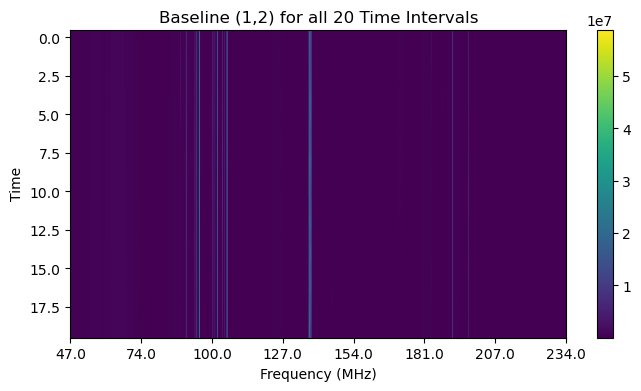

In [143]:
antenna1 = 1
antenna2 = 2
data_apair = uv.get_data(antenna1,antenna2)

print(data_apair.shape) # shape is (20, 1536) for al 20 time intervals. slice the array to get time intervals
print(data_apair.shape[0])
# Waterfall Plot 
fig, axs = plt.subplots(1,1,figsize=(8,4))
im = plt.imshow(np.abs(data_apair),aspect='auto')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
axs.set_title('Baseline (1,2) for all 20 Time Intervals')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

#### Question E
Plot a waterfall plot of baseline (1, 2) for the first time interval.


(1, 1536)


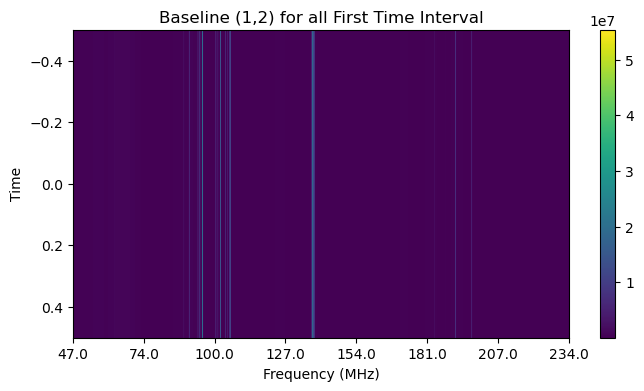

In [144]:
antenna1 = 1
antenna2 = 2
data_apair = uv.get_data(antenna1,antenna2)[0:1,0:1536]

print(data_apair.shape) # shape is (20, 1536) for al 20 time intervals. slice the array to get time intervals

# Waterfall Plot 
fig, axs = plt.subplots(1,1,figsize=(8,4))
im = plt.imshow(np.abs(data_apair),aspect='auto')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
axs.set_title('Baseline (1,2) for all First Time Interval')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

#### Question F
Plot a waterfall plot of baseline (1, 1) for the first time interval.

(1, 1536)


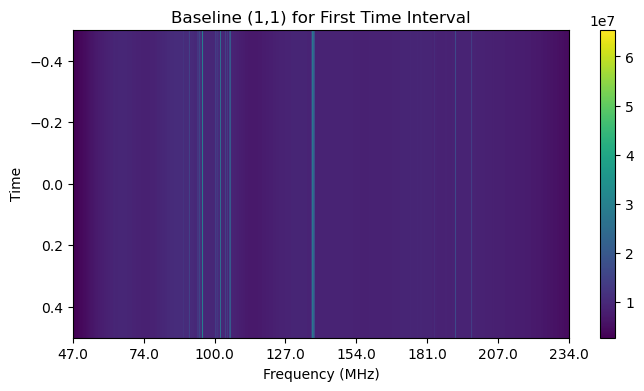

In [145]:
antenna1 = 1
antenna2 = 1
data_apair = uv.get_data(antenna1,antenna2)[0:1,0:1536]

print(data_apair.shape) # shape is (20, 1536) for al 20 time intervals. slice the array to get time intervals

# Waterfall Plot 
fig, axs = plt.subplots(1,1,figsize=(8,4))
im = plt.imshow(np.abs(data_apair),aspect='auto')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
axs.set_title('Baseline (1,1) for First Time Interval')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

#### Question G
For the first time interval, remove all the auto correlation pairs, and plot the waterfall plot of the average of the remaining pairs.

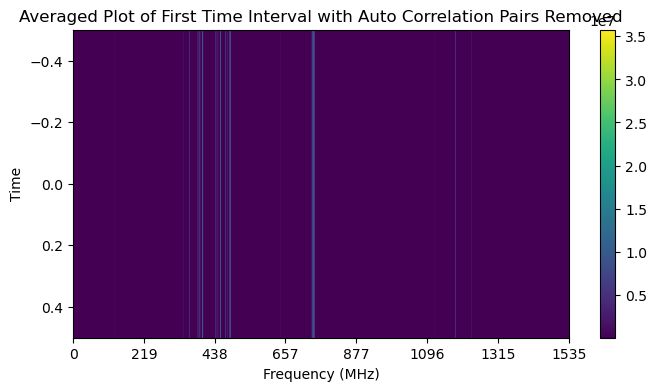

In [146]:
# Loop through pairs and remove the auto correlation pairs
g = [] # initialize g to fill with filtered vals


for baseline in uv.baseline_array:
    antenna1, antenna2 = uv.baseline_to_antnums(baseline)
    if antenna1 != antenna2:
        data_apair = uv.get_data(antenna1,antenna2)[0:1,0:1536]
        g.append(np.abs(data_apair))
        
        
# Waterfall Plot 
fig, axs = plt.subplots(1,1,figsize=(8,4))
im = plt.imshow(np.mean(g, axis=0),aspect='auto')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
axs.set_title('Averaged Plot of First Time Interval with Auto Correlation Pairs Removed')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
# _ = axs.set_xticklabels(xticklabels)



#### Question H
For the first time interval, remove all the auto correlation pairs, and plot the average amplitude as a function of frequency, this is a 1-d plot.

Text(0, 0.5, 'Average Amplitude')

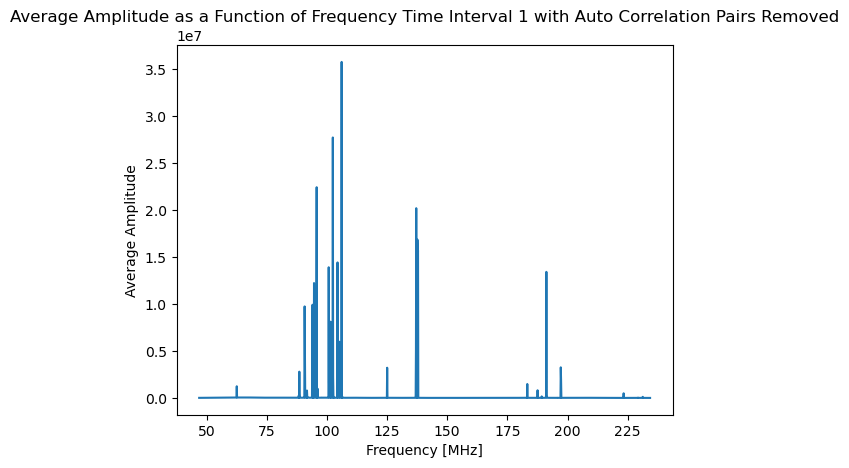

In [147]:
amplitude = np.mean(g, axis=0) # averages of pairs also used in waterfall plot
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz


# 1D Plot of freqs and averages from part D
plt.plot(freqs, np.transpose(amplitude))
plt.title('Average Amplitude as a Function of Frequency Time Interval 1 with Auto Correlation Pairs Removed')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Average Amplitude')



# Task 2 Eliminate Human Sources Contamination

1. For some baseline pair, compute the amplitude of the difference in visibility between each
    pair of adjacent time slices (there should be 19 such pairs, in total)

In [148]:
# Choose pair (1,2)
antenna1 = 1
antenna2 = 2
data_apair = uv.get_data(antenna1,antenna2)
# np.diff computes diff between adjacent array elements moving along n
amplitudes = np.abs(data_apair)
difference = np.abs(np.diff(amplitudes, axis=0))
print(amplitudes.shape)
print(difference.shape)

(20, 1536)
(19, 1536)


2. Make some plots investigating this data and determine a reasonable amplitude threshold that will eliminate outliers

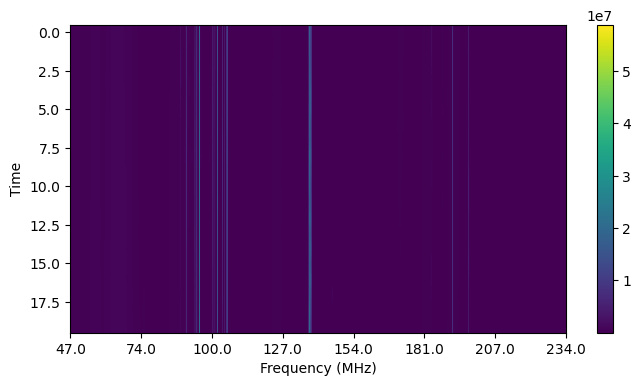

In [149]:
# Waterfall Plot before elimination
fig, axs = plt.subplots(1,1,figsize=(8,4))
im = plt.imshow(amplitudes,aspect='auto')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

Text(0, 0.5, 'Avg. Amplitude')

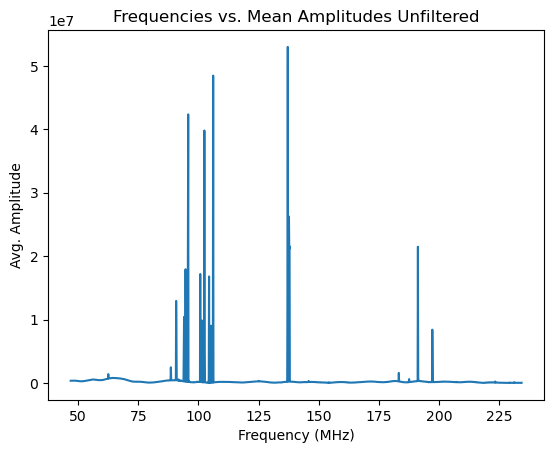

In [150]:
# Plot freq vs. mean amplitude before filtering
plt.plot(freqs, np.mean(amplitudes, axis=0))
plt.title('Frequencies vs. Mean Amplitudes Unfiltered')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Avg. Amplitude')

In [151]:
# Based on plots, assume normal distribution of mean amplitudes.
# Make amplitude threshold within a couple standard deviations of the avg. and  filter frequencies accordingly
diff_avg = np.mean(difference, axis=0)
diff_sd = np.std(difference, axis=0)
threshold = diff_avg + 2 * diff_sd
print(diff_avg)
print(diff_sd)
print(threshold)

[2553.20190647 2668.2987292  3037.66546941 ... 3735.22909911 4051.82354634
 2443.51318487]
[1567.71507023 1855.10055723 2249.01074381 ... 2461.82232138 3015.00893588
 1207.22418695]
[ 5688.63204692  6378.49984366  7535.68695704 ...  8658.87374187
 10081.8414181   4857.96155878]


3. Apply this threshold to each pair of adjacent time slices to get a list of all frequencies that you will remove. To be conservative, if the amplitude for some frequency is above your threshold in any of the pairs, then that frequency should be removed.

In [152]:
# Identify vals to reject
freqs_reject = np.any(difference > threshold, axis=0) # List of frequencies to remove based on threshold
rejected_indices = np.where(freqs_reject)[0] # Location of frequencies to remove 
amplitudes_filtered = np.delete(amplitudes, rejected_indices, axis=1) # Delete data corresponding to indices to reject
freqs = uv.freq_array[0]*1e-6 # Original frequencies
freqs_filtered = np.delete(freqs, rejected_indices) # Delete frequencies correspondinf to indices to reject



4. Make plots of your data (e.g., waterfall plots) before/after filtering to convince yourself that you have removed frequencies that exhibit large variation over time

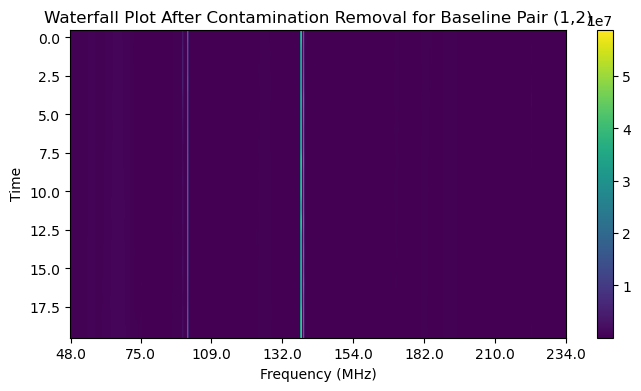

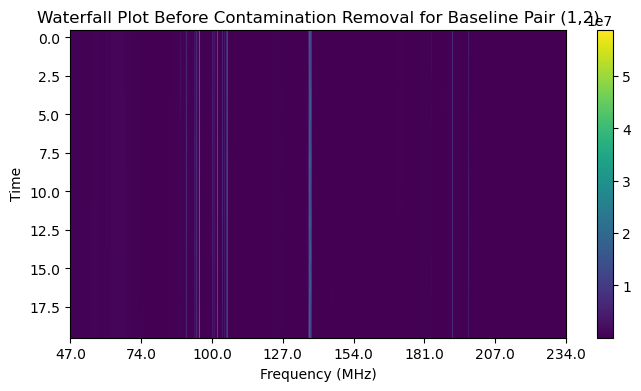

In [153]:
# Plot of filtered
fig, axs = plt.subplots(1,1,figsize=(8,4))
im = plt.imshow(amplitudes_filtered,aspect='auto')
cbar = fig.colorbar(im)

axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
axs.set_title('Waterfall Plot After Contamination Removal for Baseline Pair (1,2)')
xticks = [int(i) for i in np.linspace(0,len(freqs_filtered)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs_filtered[xticks],0)
_ = axs.set_xticklabels(xticklabels)



# Waterfall Plot before elimination
fig, axs = plt.subplots(1,1,figsize=(8,4))
im = plt.imshow(amplitudes,aspect='auto')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
axs.set_title('Waterfall Plot Before Contamination Removal for Baseline Pair (1,2)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

5. Remake the average amplitude vs frequency plot that you did in the previous lab before/after filtering. Are there still any frequencies that appear to have large amplitude? If so, why were they not removed?

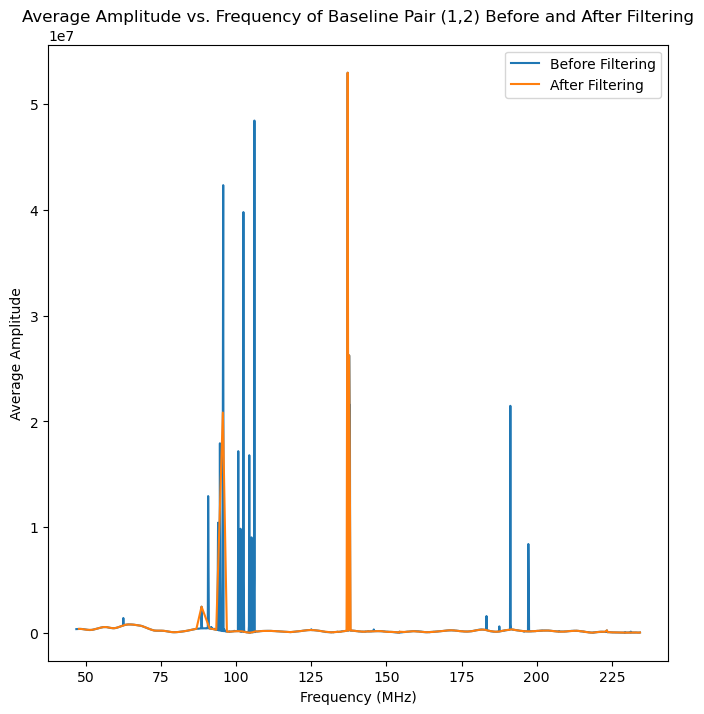

In [154]:
# Find avg. amplitudes for before and after filtering
mean_contaminated = np.mean(amplitudes, axis=0)
mean_clean = np.mean(amplitudes_filtered, axis=0)

# Plot
fig, ax = plt.subplots(figsize=(8,8))
freqs = uv.freq_array[0]*1e-6
ax.plot(freqs, mean_contaminated,  label='Before Filtering')
ax.plot(freqs_filtered, mean_clean, label='After Filtering')
ax.set_title('Average Amplitude vs. Frequency of Baseline Pair (1,2) Before and After Filtering')
ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('Average Amplitude')
ax.legend()

6. To identify contamination in this lab, we transformed our data, looking at the difference of adjacent time slices to find large variation vs time. This is, in general, a key concept: transforming our data in some fashion to isolate a particular feature of the data and analyze it more closely. For the next lab, we will look for signals that are constant with time. What is a similar transformation that is likely to increase our sensitivity to such signals, compared to transient signals?

Since signals should be constant with time we could find the avg. and std. again, but set the threshold to keep values that allow for a very small variance.